<a href="https://colab.research.google.com/github/Priyanka24322/Data-Visualization-Analysis-Projects/blob/main/World_Map_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Analyzing and Visualizing Population data and CO2 emissions (metric tons per capita)

Here I have plotted the world maps using different libraries like ***PyGal***,
***geopandas*** and ***Plotly***.

World maps give us a better way to analyze the data by looking at the global picture. Here we have used CO2 emissions data for world map because in the climate submit that just happend in November 2023, the world leaders came together to solve the problem of global warming. But if we look at the bigger picture some developed countries are more responsible for the climate change compared to others, so they should provide compensations to the developing countries to tackle this problem. Let's visualize the data that is taken from
[World Bank Indicators datasets](https://databank.worldbank.org/source/world-development-indicators).





In [ ]:
!pip install pygal
!pip install pygal_maps_world

In [ ]:
import os

directory = "World_maps"

if not os.path.exists(directory):
    os.makedirs(directory)

In [ ]:
import json
import pygal
from pygal.style import RotateStyle as RS, LightColorizedStyle as LCS
from pygal.maps.world import World
from pygal.maps.world import COUNTRIES

### Plotting America the world map (using pygal)

In [ ]:
wm_america = pygal.maps.world.World()

wm_america.title = 'North, Central, and South America'

wm_america.add('North America', ['ca', 'mx', 'us'])
wm_america.add('Central America',  ['bz', 'cr', 'gt', 'hn', 'ni', 'pa', 'sv'])
wm_america.add('South America', ['ar', 'bo', 'br', 'cl', 'co', 'ec', 'gf', 'gy', 'pe', 'py', 'sr', 'uy', 've'])

wm_america.render_to_file(os.path.join(directory, 'america_map.svg'))

In [ ]:
from IPython.display import SVG

SVG(filename='/content/World_maps/america_map.svg')

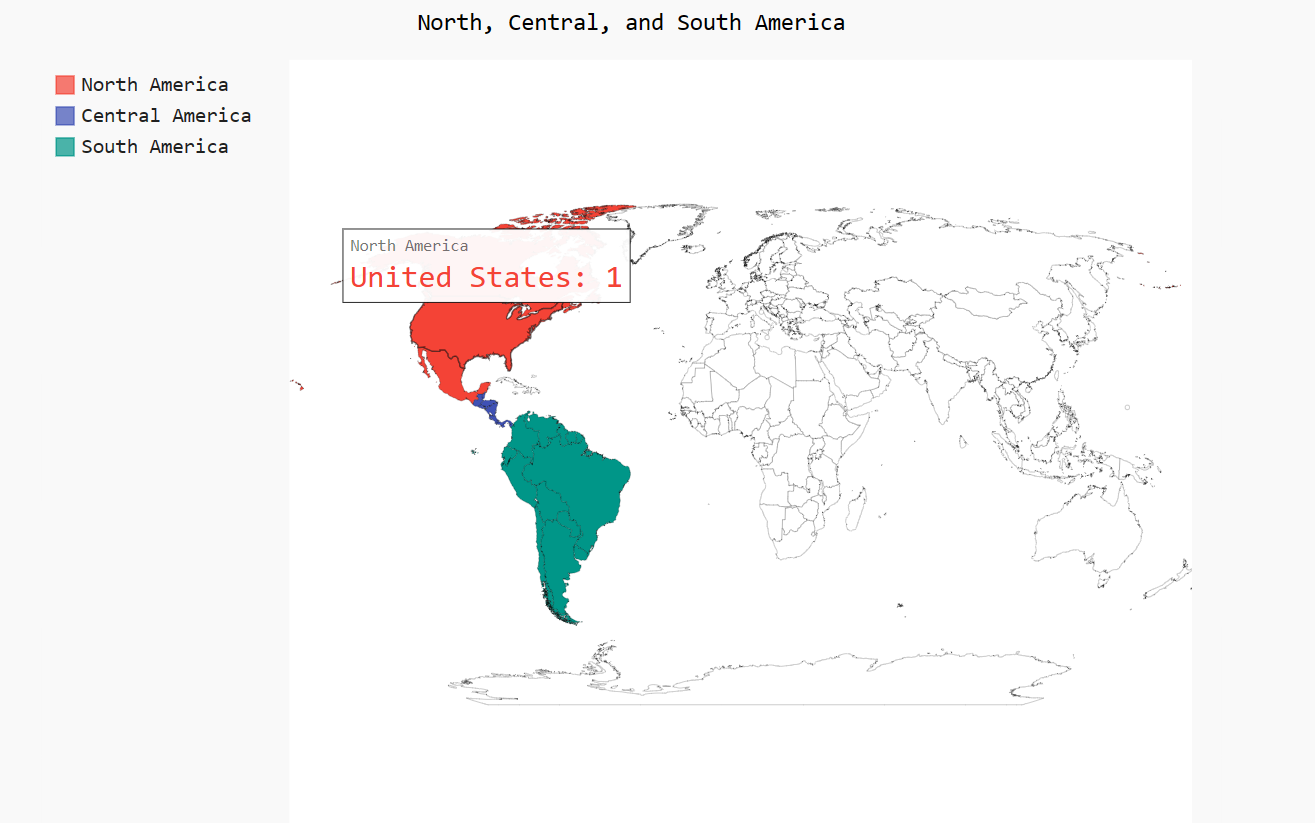

### Plotting the Population of all the countries for year 2010 in the world map (using pygal)

In [ ]:
def get_country_code(country_name):
    for code, name in COUNTRIES.items():
        if name == country_name:
            return code

In [ ]:
# Loading the data into a list
import requests
import json

url = "https://raw.githubusercontent.com/Priyanka24322/Data-Visualization-Analysis-Projects/refs/heads/main/Datasets/population_data.json"
response = requests.get(url)
pop_data = json.loads(response.content)

# Printing the 2010 population for each country
for pop_dict in pop_data:
    if pop_dict['Year'] == '2010':
        country_name = pop_dict['Country Name']
        population = int(float(pop_dict['Value']))
        # print(country_name + ": " + str(population))
        code = get_country_code(country_name)
        if code:
            print(code + ': ' + str(population))
        else:
            print('ERROR -' + country_name)


ERROR -Arab World
ERROR -Caribbean small states
ERROR -East Asia & Pacific (all income levels)
ERROR -East Asia & Pacific (developing only)
ERROR -Euro area
ERROR -Europe & Central Asia (all income levels)
ERROR -Europe & Central Asia (developing only)
ERROR -European Union
ERROR -Heavily indebted poor countries (HIPC)
ERROR -High income
ERROR -High income: nonOECD
ERROR -High income: OECD
ERROR -Latin America & Caribbean (all income levels)
ERROR -Latin America & Caribbean (developing only)
ERROR -Least developed countries: UN classification
ERROR -Low & middle income
ERROR -Low income
ERROR -Lower middle income
ERROR -Middle East & North Africa (all income levels)
ERROR -Middle East & North Africa (developing only)
ERROR -Middle income
ERROR -North America
ERROR -OECD members
ERROR -Other small states
ERROR -Pacific island small states
ERROR -Small states
ERROR -South Asia
ERROR -Sub-Saharan Africa (all income levels)
ERROR -Sub-Saharan Africa (developing only)
ERROR -Upper middle in

In [ ]:
# Build a dictionary of population data.
cc_populations = {}
for pop_dict in pop_data:
    if pop_dict['Year'] == '2010':
        country = pop_dict['Country Name']
        population = int(float(pop_dict['Value']))
        code = get_country_code(country)

        if code:
            cc_populations[code] = population

In [ ]:
# Group the countries into 3 population levels.
cc_pops_1, cc_pops_2, cc_pops_3 = {}, {}, {}
for cc, pop in cc_populations.items():
    if pop < 10000000:
        cc_pops_1[cc] = pop
    elif pop < 1000000000:
        cc_pops_2[cc] = pop
    else:
        cc_pops_3[cc] = pop

In [ ]:
# See how many countries are at each level.
print(len(cc_pops_1), len(cc_pops_2), len(cc_pops_3))

85 69 2


In [ ]:
wm_style = RS('#336699', base_style=LCS)
wm = pygal.maps.world.World(style = wm_style)
wm.title = 'World Population in 2010, by Country'
wm.add('0-10m', cc_pops_1)
wm.add('10m-1bn', cc_pops_2)
wm.add('>1bn', cc_pops_3)

wm.render_to_file(os.path.join(directory, 'world_population_1.svg'))


In [ ]:
SVG(filename='/content/World_maps/world_population_1.svg')

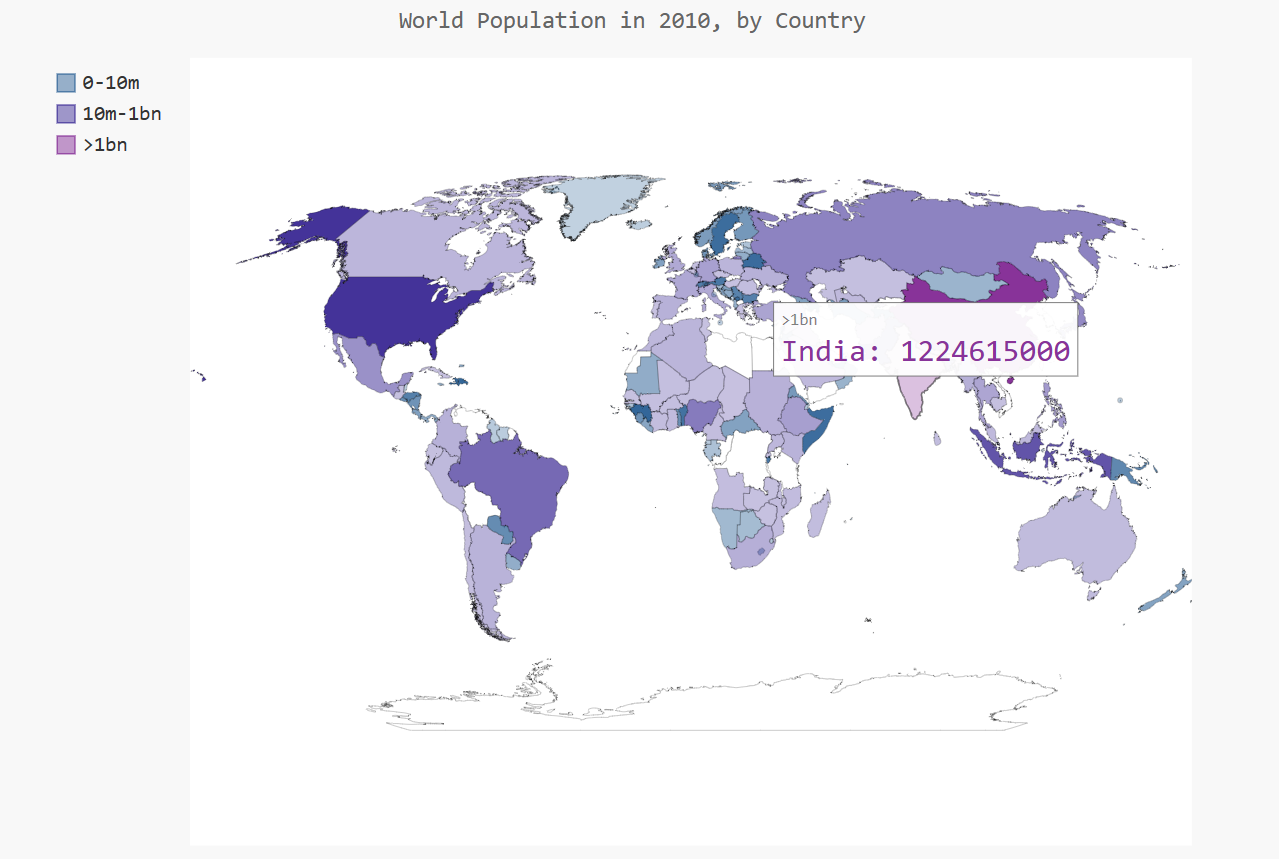

### Plotting CO2 Emissions(metric tons per capita) for year 2020 in the world map (using Pandas)

The Below data is downloaded from 'https://data.worldbank.org/indicator/'.


In [ ]:
import pandas as pd

# Loading the csv file into a dataframe
filepath = 'https://raw.githubusercontent.com/Priyanka24322/Data-Visualization-Analysis-Projects/refs/heads/main/Datasets/API_EN.ATM.CO2E.PC_DS2_en_csv_v2_5995557.csv'
df = pd.read_csv(filepath)

print(df.head(10))

                  Country Name Country Code  \
0                        Aruba          ABW   
1  Africa Eastern and Southern          AFE   
2                  Afghanistan          AFG   
3   Africa Western and Central          AFW   
4                       Angola          AGO   
5                      Albania          ALB   
6                      Andorra          AND   
7                   Arab World          ARB   
8         United Arab Emirates          ARE   
9                    Argentina          ARG   

                           Indicator Name  Indicator Code  1960  1961  1962  \
0  CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC   NaN   NaN   NaN   
1  CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC   NaN   NaN   NaN   
2  CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC   NaN   NaN   NaN   
3  CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC   NaN   NaN   NaN   
4  CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC   NaN   NaN   NaN   
5  CO2 e

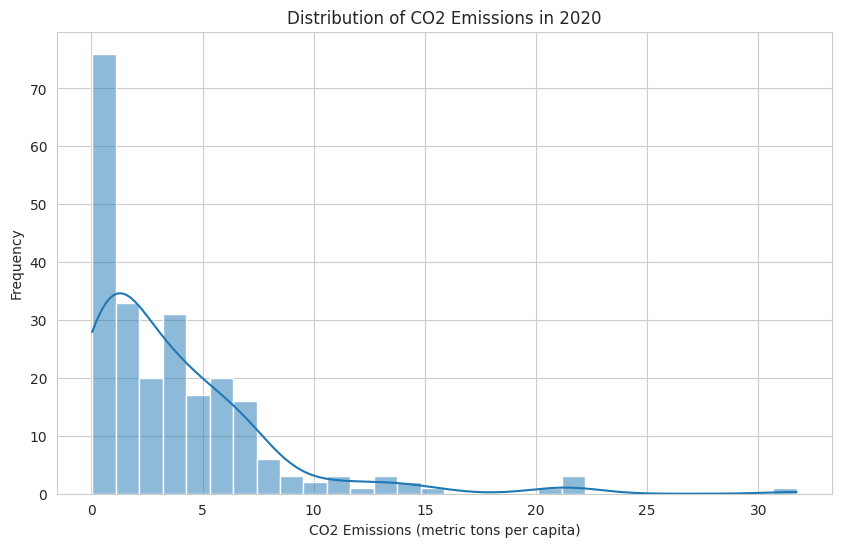

In [ ]:
# Plotting the data into a histogram for the most recent year (in this case year: 2020)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

numeric_df = df.drop(columns=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'])
numeric_df = numeric_df.apply(pd.to_numeric, errors='coerce')
recent_year = numeric_df.columns[-3]  # Since the last two columns are empty

# Drop NaN values for the selected year
year_data = numeric_df[recent_year].dropna()

# Plot the distribution of CO2 emissions for the most recent year
plt.figure(figsize=(10, 6))
sns.histplot(year_data, bins=30, kde=True)
plt.title('Distribution of CO2 Emissions in ' + recent_year)
plt.xlabel('CO2 Emissions (metric tons per capita)')
plt.ylabel('Frequency')
plt.show()

The plot shows that most of the countries have CO2 emissions values between 0 and 10 metric tons per capita, with a few outliers that have much higher values. The plot also shows that the distribution is skewed to the right, meaning that there are more countries with low CO2 emissions than with high CO2 emissions. The kde curve shows the general trend of the distribution, which has a peak around 2 metric tons per capita.

<ipython-input-15-cedfaeb4633b>:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


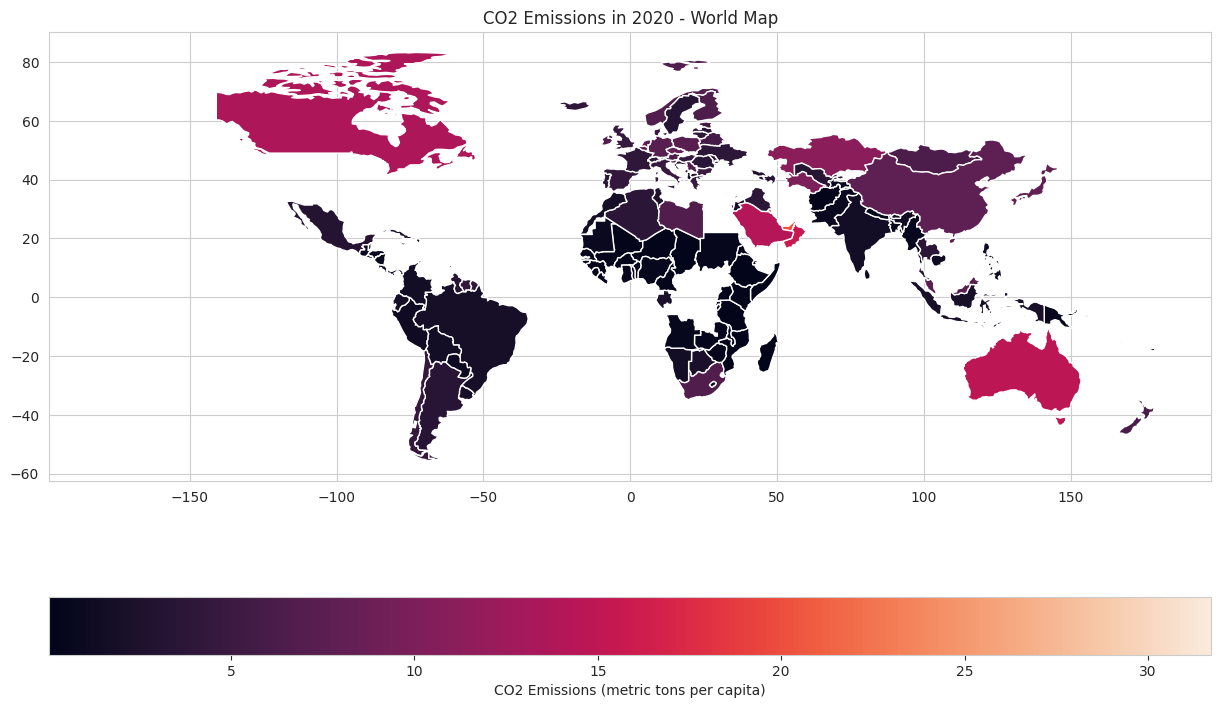

In [ ]:
import geopandas as gpd

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world_emissions = world.merge(df, how='left', left_on='name', right_on='Country Name')

# Convert the year columns to numeric, ignoring NaNs
world_emissions[recent_year] = pd.to_numeric(world_emissions[recent_year], errors='coerce')

# Plot the world map with CO2 emissions data
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world_emissions.plot(column=recent_year, ax = ax, legend=True,
                     legend_kwds={'label': 'CO2 Emissions (metric tons per capita)',
                                  'orientation': 'horizontal'})

plt.title('CO2 Emissions in ' + recent_year + ' - World Map')
plt.show()

In [ ]:
import plotly.express as px

fig = px.choropleth(
    df,
    locations='Country Code',
    color='2020',
    hover_name='Country Name',
    color_continuous_scale='Oranges',
    title='CO2 Emissions (metric tons per capita) in 2020'
)

fig.update_geos(
    projection_type="natural earth",
    showcoastlines=True,
    coastlinecolor="White",
    showland=True
)

fig.show()

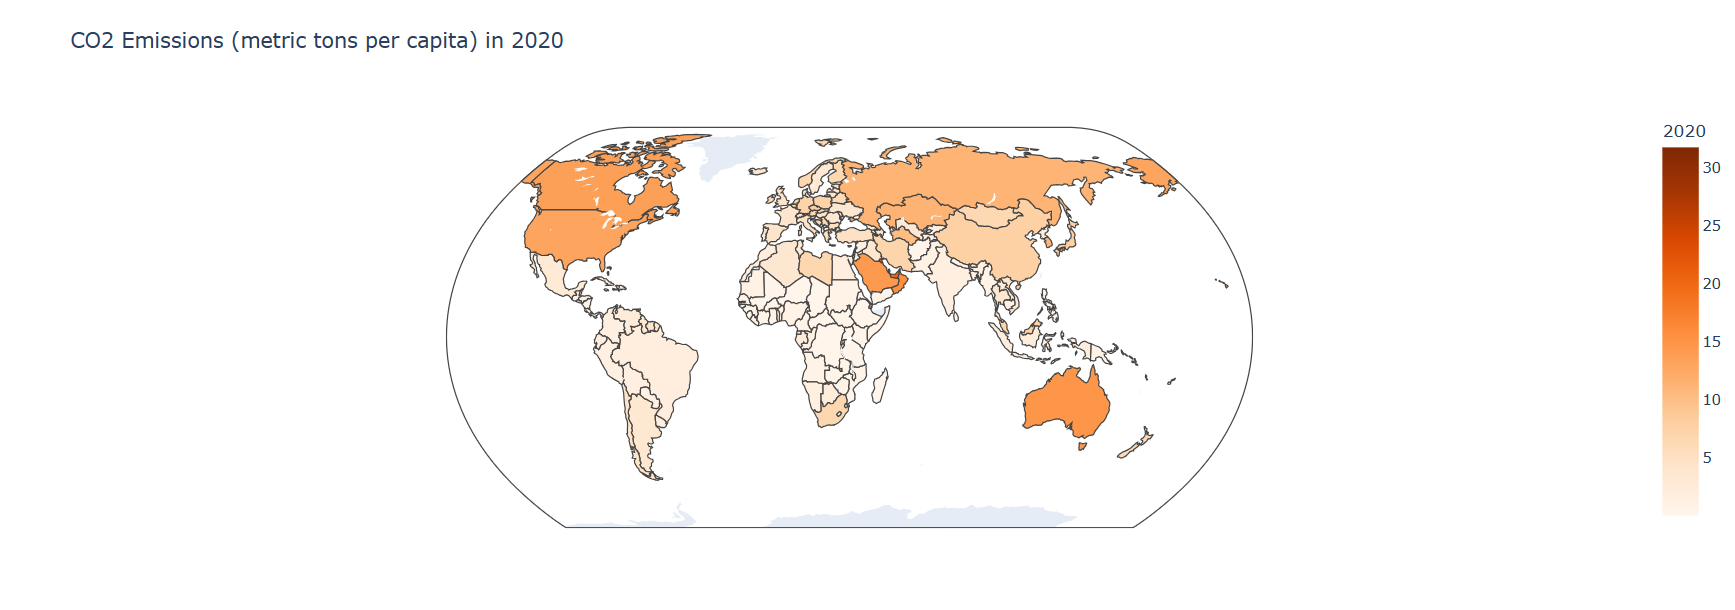